In [1]:
##############################################################################
#OPTIMIZATION & AI - FINAL LAB 
##############################################################################

# CAZALI Solène, COMBES Emilien, FERHAT Matthieu, CHEVALIER Constantin, LOVITON Pierre

In [ ]:
#Sauvegarder les prédictions : 
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)


# Librairies

In [1]:
# System imports
import matplotlib.pyplot as plt
import numpy as np
import datetime
from time import process_time

#Extra library imports
from PIL import Image
from scipy import optimize
import scipy.ndimage as ndi
import pandas as pd
import seaborn as sns
from scipy import ndimage

In [2]:
#print actual path to the repertory
import os
os.getcwd()

'/Users/pierreloviton/PycharmProjects/data-science/ISEP/IA/Final Lab'

In [3]:
# User inputs
impath000 = '/Users/pierreloviton/PycharmProjects/data-science/ISEP/IA/Final Lab/training_data/im-000.tiff'

In [4]:
csvpath = '/Users/pierreloviton/PycharmProjects/data-science/ISEP/IA/Final Lab/training_labels.csv'

# 1- Training part

## 1.1- Data exploration

In [5]:
df = pd.read_csv(csvpath)
df.head()

,Image_id,View
0,im-000,axial
1,im-001,axial
2,im-002,axial
3,im-003,coronal
4,im-004,coronal


In [34]:
df.shape

(300, 2)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='View', ylabel='count'>

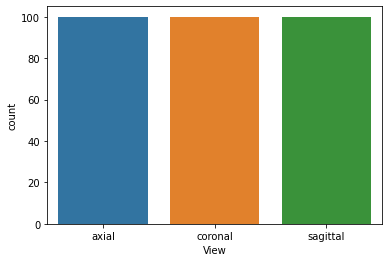

In [37]:
sns.countplot(df.View)

Dans cette partie, nous avons importer les fonctions nécessaires, le dataframe contenant les labels, et afficher la répartion des différentes Views

## 1.2- Features Extraction

Nous avons créé 4 fonctions différents, déposées dans le répertoire sous le nom : functions.py.

- symmetry_analysis : calcul la valeur de a,b,c de l'axe de symétrie ainsi que le pourcentage que la figure prend dans sa boundery box

- contour_length_analysis : calcul la longueur des contours des figures

- all_contour_length_analysis : calcul la longueur de tous les contours, avec un seuil moindre qui affiche les petits nerfs visibles

- iou_circle_analysis : calcul le IoU de chaque figure par rapport à un cercle. Cela permet de déterminer si oui ou non, une figure ressemble à un cercle


In [6]:
from functions import symmetry_analysis, contour_length_analysis, all_contour_length_analysis, iou_circle_analysis

In [7]:
os.path.isfile('/Users/pierreloviton/PycharmProjects/data-science/ISEP/IA/Final Lab/training_data/im-176.tiff')

False



impath Num: 0
The mask is composed of 13483 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 72.90%
Cropped image of dimension 136 x 136 pixels
The best initial loss is : 0.034858710969368836
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -68
The initial loss value is 838265.1091330597


impath Num: 1
The mask is composed of 5371 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 48.83%
Cropped image of dimension 110 x 100 pixels
The best initial loss is : 0.05734500093092534


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


The best associated parameters are : 
 a= 1 
 b= 0 
 c= -55
The initial loss value is 530113.1772379781


impath Num: 2
The mask is composed of 79 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 24.38%
Cropped image of dimension 27 x 12 pixels
The best initial loss is : 0.5443037974683544
The best associated parameters are : 
 a= 0.4230769230769231 
 b= 1 
 c= -13.5
The initial loss value is 3105.7445735711294


impath Num: 3
The mask is composed of 11793 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 75.22%
Cropped image of dimension 134 x 117 pixels
The best initial loss is : 0.05113202747392521
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -67
The initial loss value is 330577.57777589915


impath Num: 4
The mask is composed of 9254 pixels
The percentage of pixels included in the bounding box i

The best initial loss is : 0.17744506827476259
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -80
The initial loss value is 1438112.164853745


impath Num: 24
The mask is composed of 14813 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 63.14%
Cropped image of dimension 170 x 138 pixels
The best initial loss is : 0.2196719098089516
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -69
The initial loss value is 1482963.6847347359


impath Num: 25
The mask is composed of 2731 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 74.86%
Cropped image of dimension 76 x 48 pixels
The best initial loss is : 0.05016477480776273
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -38
The initial loss value is 63549.56681133662


impath Num: 26
The mask is composed of 10438 pixels
The percentage of pixe

The best initial loss is : 0.06094738466286067
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -42
The initial loss value is 84685.93520619515


impath Num: 46
The mask is composed of 69 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 53.08%
Cropped image of dimension 10 x 13 pixels
The best initial loss is : 0.3333333333333333
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -5
The initial loss value is 196.6813824047866


impath Num: 47
The mask is composed of 15755 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 65.90%
Cropped image of dimension 139 x 172 pixels
The best initial loss is : 0.21796255157092986
The best associated parameters are : 
 a= 1.2391304347826086 
 b= 1 
 c= -173.5
The initial loss value is 3237662.3346761116


impath Num: 48
The mask is composed of 10422 pixels
The p

The best initial loss is : 0.14289241912914644
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -76
The initial loss value is 756645.3600445575


impath Num: 68
The mask is composed of 4017 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 76.46%
Cropped image of dimension 74 x 71 pixels
The best initial loss is : 0.045307443365695796
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -37
The initial loss value is 21181.606204186228


impath Num: 69
The mask is composed of 11604 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 78.49%
Cropped image of dimension 132 x 112 pixels
The best initial loss is : 0.03929679420889348
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -66
The initial loss value is 423224.68330995983


impath Num: 70
The mask is composed of 7910 pixels
The percentage of pi

The best initial loss is : 0.21395226510618712
The best associated parameters are : 
 a= 1.210144927536232 
 b= 1 
 c= -169.5
The initial loss value is 2711588.602683249


impath Num: 90
The mask is composed of 4498 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 72.50%
Cropped image of dimension 66 x 94 pixels
The best initial loss is : 0.07047576700755892
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -47
The initial loss value is 93942.70834245841


impath Num: 91
The mask is composed of 13563 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 67.75%
Cropped image of dimension 130 x 154 pixels
The best initial loss is : 0.16972646169726463
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -77
The initial loss value is 906960.866500866


impath Num: 92
The mask is composed of 15001 pixels
The 

The best initial loss is : 0.09907529722589167
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -46
The initial loss value is 148526.892320173


impath Num: 112
The mask is composed of 4423 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 70.01%
Cropped image of dimension 78 x 81 pixels
The best initial loss is : 0.06850553922676916
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -39
The initial loss value is 27343.384767568954


impath Num: 113
The mask is composed of 14090 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 67.66%
Cropped image of dimension 137 x 152 pixels
The best initial loss is : 0.04229950319375444
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -68
The initial loss value is 880436.7271726202


impath Num: 114
The mask is composed of 4921 pixels
The percentage of pi

The best associated parameters are : 
 a= 0 
 b= 1 
 c= -55
The initial loss value is 418765.07350795326


impath Num: 133
The mask is composed of 7959 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 69.82%
Cropped image of dimension 95 x 120 pixels
The best initial loss is : 0.1339364241738912
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -60
The initial loss value is 228698.68886687825


impath Num: 134
The mask is composed of 7114 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 72.00%
Cropped image of dimension 104 x 95 pixels
The best initial loss is : 0.09150969918470621
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -52
The initial loss value is 197409.31247538066


impath Num: 135
The mask is composed of 15835 pixels
The percentage of pixels included in the bounding box is 100.00%


The best initial loss is : 0.025579710144927537
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -62
The initial loss value is 1362986.126305861


impath Num: 156
The mask is composed of 2137 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 68.94%
Cropped image of dimension 62 x 50 pixels
The best initial loss is : 0.10528778661675246
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -25
The initial loss value is 25472.894605550508


impath Num: 157
The mask is composed of 6093 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 65.64%
Cropped image of dimension 102 x 91 pixels
The best initial loss is : 0.1137370753323486
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -46
The initial loss value is 81305.8916458952


impath Num: 158
The mask is composed of 3688 pixels
The percentage of pixe

The best initial loss is : 0.1719305584605731
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -82
The initial loss value is 1178734.3889154324


impath Num: 179
The mask is composed of 11205 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 76.87%
Cropped image of dimension 129 x 113 pixels
The best initial loss is : 0.027219991075412762
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -64
The initial loss value is 742641.1296616719


impath Num: 180
The mask is composed of 600 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 38.36%
Cropped image of dimension 34 x 46 pixels
The best initial loss is : 0.065
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -17
The initial loss value is 11097.799412052624


impath Num: 181
The mask is composed of 6730 pixels
The percentage of pixels included

The best initial loss is : 0.02461429749146155
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -64
The initial loss value is 3936098.860189084


impath Num: 202
The mask is composed of 3730 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 71.46%
Cropped image of dimension 90 x 58 pixels
The best initial loss is : 0.058176943699731906
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -45
The initial loss value is 102687.35686858016


impath Num: 203
The mask is composed of 3198 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 67.18%
Cropped image of dimension 85 x 56 pixels
The best initial loss is : 0.1022514071294559
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -42
The initial loss value is 138146.01682379734


impath Num: 204
The mask is composed of 7087 pixels
The percentage of pix

The best associated parameters are : 
 a= 1 
 b= 0 
 c= -54
The initial loss value is 278577.75308690674


impath Num: 224
The mask is composed of 4086 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 70.50%
Cropped image of dimension 63 x 92 pixels
The best initial loss is : 0.11918746940773373
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -32
The initial loss value is 234473.16392767197


impath Num: 225
The mask is composed of 9515 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 64.46%
Cropped image of dimension 121 x 122 pixels
The best initial loss is : 0.06421439831844455
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -60
The initial loss value is 1062003.7019694047


impath Num: 226
The mask is composed of 5156 pixels
The percentage of pixels included in the bounding box is 100.00%


The initial loss value is 783277.0965762085


impath Num: 245
The mask is composed of 13546 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 80.92%
Cropped image of dimension 135 x 124 pixels
The best initial loss is : 0.030710172744721688
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -62
The initial loss value is 951691.3519159033


impath Num: 246
The mask is composed of 10214 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 75.32%
Cropped image of dimension 120 x 113 pixels
The best initial loss is : 0.039259839436068145
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -60
The initial loss value is 624008.7984167379


impath Num: 247
The mask is composed of 11306 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by t

The best associated parameters are : 
 a= 0 
 b= 1 
 c= -54
The initial loss value is 453410.02209814906


impath Num: 267
The mask is composed of 131 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 54.58%
Cropped image of dimension 16 x 15 pixels
The best initial loss is : 0.3816793893129771
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -8
The initial loss value is 234.3284843944115


impath Num: 268
The mask is composed of 3191 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 69.52%
Cropped image of dimension 85 x 54 pixels
The best initial loss is : 0.1065496709495456
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -42
The initial loss value is 122853.68764374261


impath Num: 269
The mask is composed of 15135 pixels
The percentage of pixels included in the bounding box is 100.00%
The pe

The best associated parameters are : 
 a= 0 
 b= 1 
 c= -59
The initial loss value is 327957.7480161467


impath Num: 289
The mask is composed of 244 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 73.94%
Cropped image of dimension 22 x 15 pixels
The best initial loss is : 0.13524590163934427
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -11
The initial loss value is 316.3581857332507


impath Num: 290
The mask is composed of 439 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 72.09%
Cropped image of dimension 29 x 21 pixels
The best initial loss is : 0.08656036446469248
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -10
The initial loss value is 772.3326140861582


impath Num: 291
The mask is composed of 15744 pixels
The percentage of pixels included in the bounding box is 100.00%
The pe

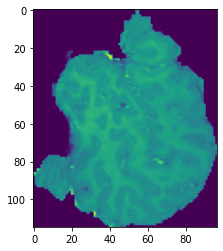

In [8]:
percentage_list = []
a_list = []
b_list = []
c_list = []
cp_list = []
tcp_list = []
iou_list = []

for i in range(300):
    
    if i <=9:
        ii = '00'
    elif i<=99:
        ii = '0'
    else:
        ii=''
        
    impath = '/Users/pierreloviton/PycharmProjects/data-science/ISEP/IA/Final Lab/training_data/im-'+ii+str(i)+'.tiff'
    print('\n\nimpath Num:',i)
    if os.path.isfile(impath)==False:
        percentage_list.append('Na')
        a_list.append('Na')
        b_list.append('Na')
        c_list.append('Na')
        cp_list.append('Na')
        tcp_list.append('Na')
        iou_list.append('Na')
    else:
        percentage, a, b, c = symmetry_analysis(impath)
        perimeter = contour_length_analysis(impath)
        total_contour_perimeter = all_contour_length_analysis(impath)
        iou = iou_circle_analysis(impath)
        
        percentage_list.append(percentage)
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)
        cp_list.append(perimeter)
        tcp_list.append(total_contour_perimeter)
        iou_list.append(iou)
    

L'image 176 était vide et posait problème lors de l'extraction de features. Nous l'avons donc supprimée de notre base de données d'entrainement et remplacée par des valeurs Na dans les listes créées.

In [9]:
df.insert(1, "iou_circle", iou_list)
df.insert(1, "total_contour_perimeter", tcp_list)
df.insert(1, "contour_perimeter", cp_list)
df.insert(1, "c_symmetry", c_list)
df.insert(1, "b_symmetry", b_list)
df.insert(1, "a_symmetry", a_list)
df.insert(1, "percentage_occupied", percentage_list)

In [10]:
df = df.drop(176)

In [11]:
df = df.drop('Image_id',axis=1)

In [12]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['percentage_occupied', 'a_symmetry', 'b_symmetry', 'c_symmetry', 'contour_perimeter', 'total_contour_perimeter', 'iou_circle', 'View']


In [13]:
df.View.loc[df.View == 'axial'] = 1
df.View.loc[df.View == 'coronal'] = 2
df.View.loc[df.View == 'sagittal'] = 3
df.View = df['View'].astype(int)

In [14]:
for i in object_cols:
    df[i] = df[i].astype(float)

In [15]:
df.head(177)

,percentage_occupied,a_symmetry,b_symmetry,c_symmetry,contour_perimeter,total_contour_perimeter,iou_circle,View
0,72.896843,1.000000,0.0,-68.0,1241.0,2603.0,0.812134,1.0
1,48.827273,1.000000,0.0,-55.0,771.0,600.0,0.669355,1.0
2,24.382716,0.423077,1.0,-13.5,114.0,47.0,0.254545,1.0
3,75.220054,1.000000,0.0,-67.0,1066.0,1189.0,0.858094,2.0
4,74.448914,1.000000,0.0,-56.0,997.0,1889.0,0.801030,2.0
...,...,...,...,...,...,...,...,...
172,66.728395,0.000000,1.0,-27.0,224.0,335.0,0.639086,2.0
173,49.034977,1.000000,0.0,-56.0,1022.0,744.0,0.543672,1.0
174,66.897170,0.000000,1.0,-68.0,1061.0,2350.0,0.803743,3.0
175,55.925528,1.000000,0.0,-24.0,483.0,521.0,0.539776,2.0


Nous analysons, à l'aide de quelques graphes, les données obtenues :

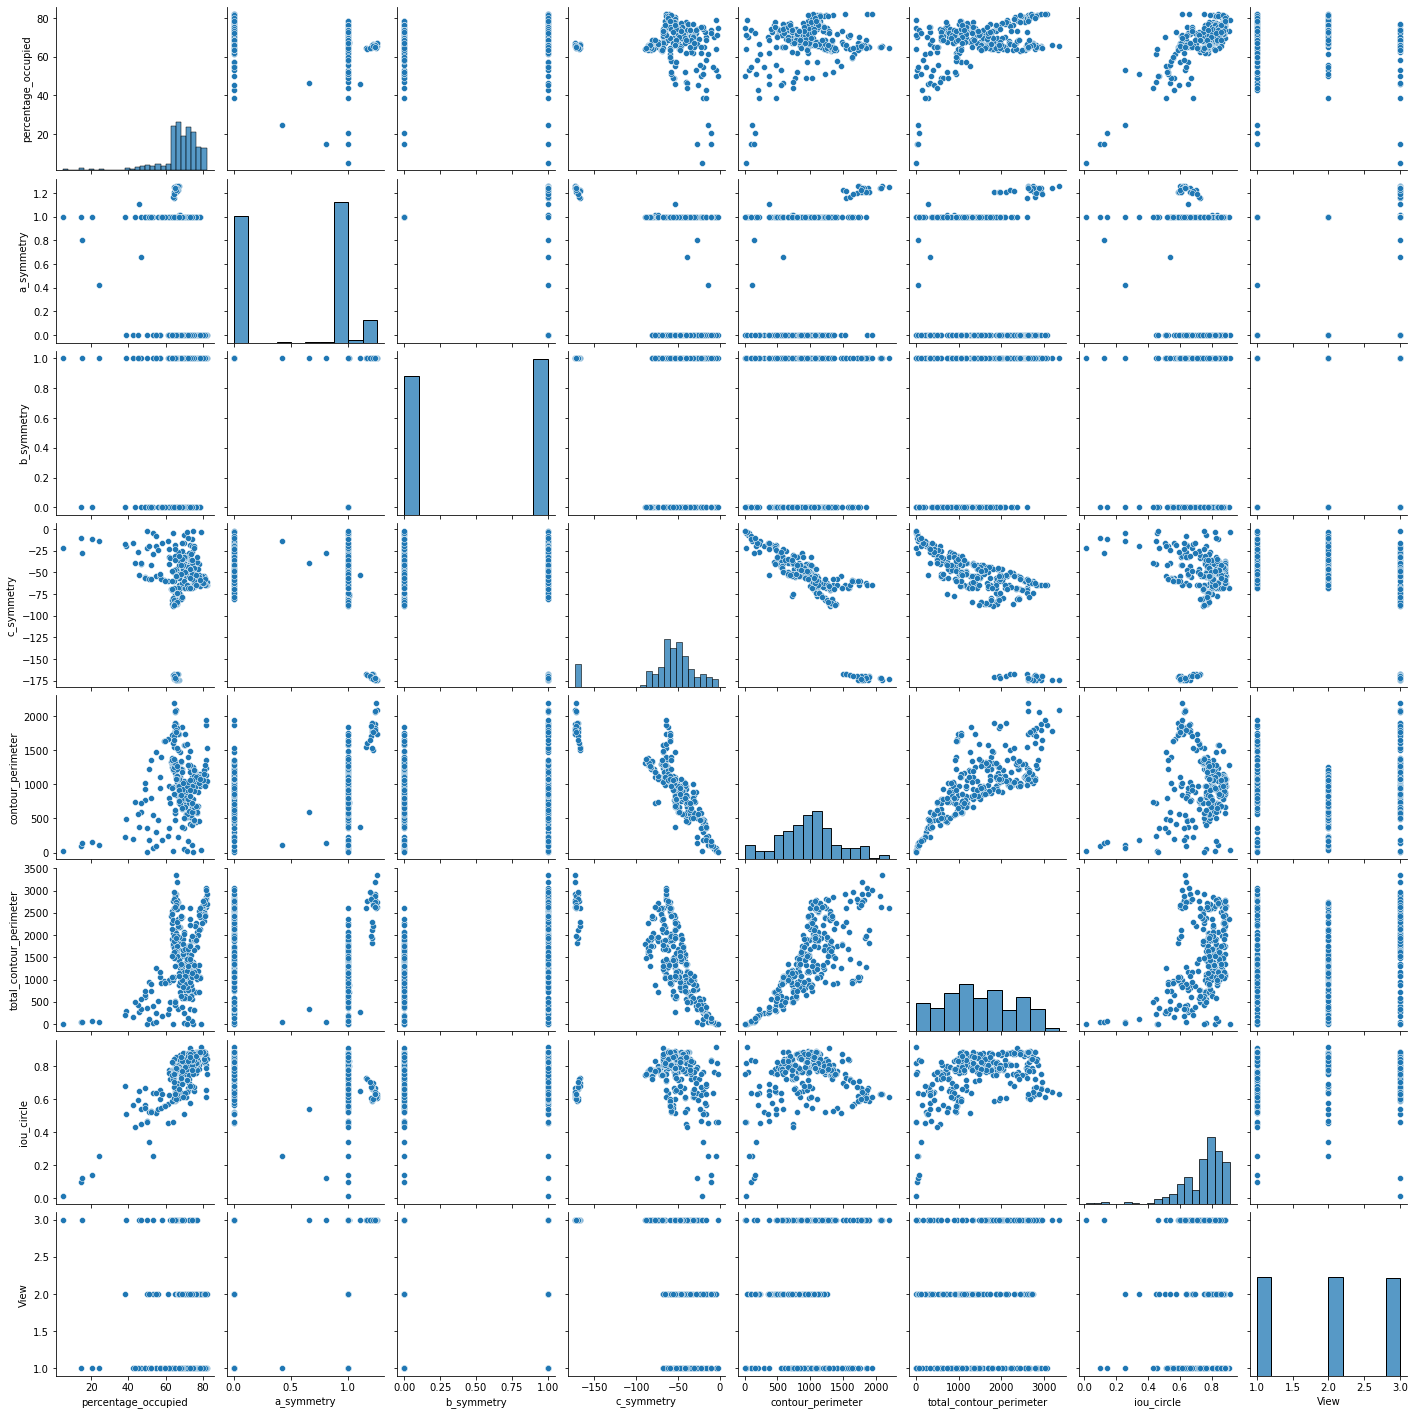

In [19]:
sns.pairplot(df)

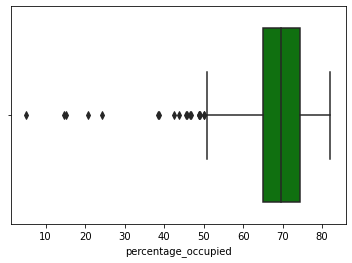

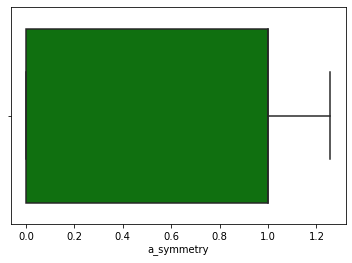

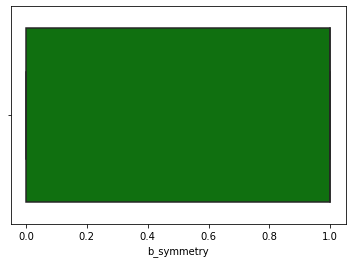

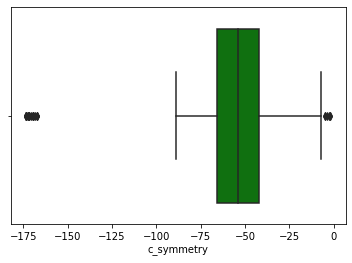

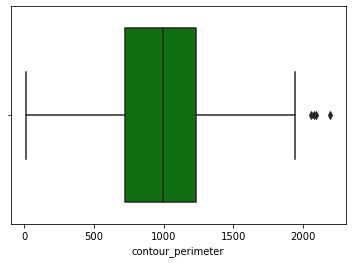

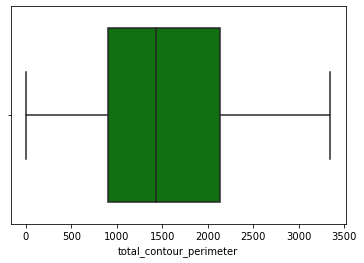

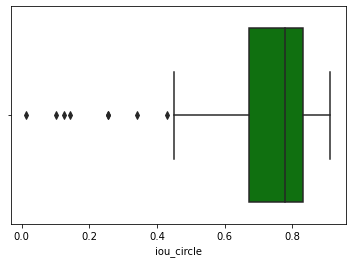

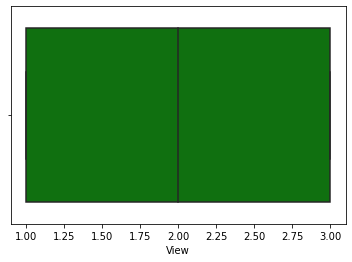

In [21]:
for i in df.columns:
    sns.boxplot(x=i,data=df,color ='g')
    plt.xlabel(i)
    plt.show()

In [22]:
for i in df.columns:
    print(i)

percentage_occupied
a_symmetry
b_symmetry
c_symmetry
contour_perimeter
total_contour_perimeter
iou_circle
View


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


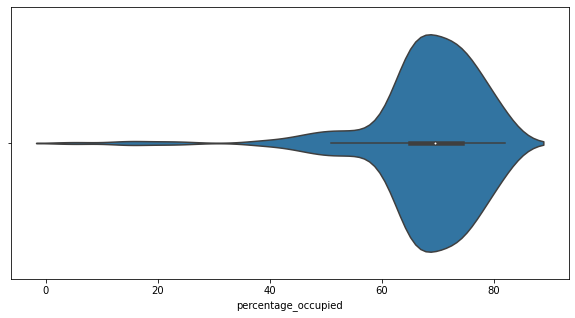

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


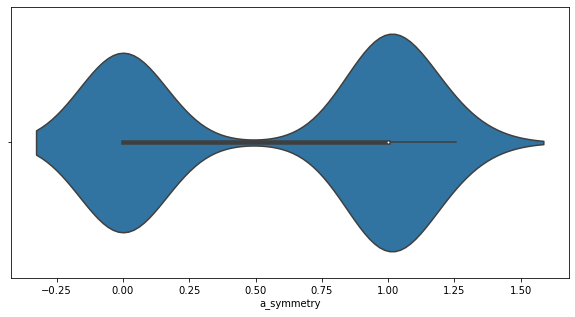

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


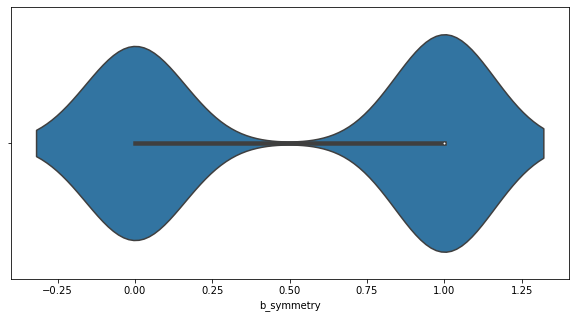

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


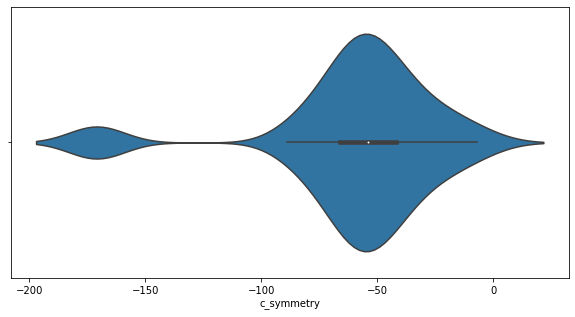

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


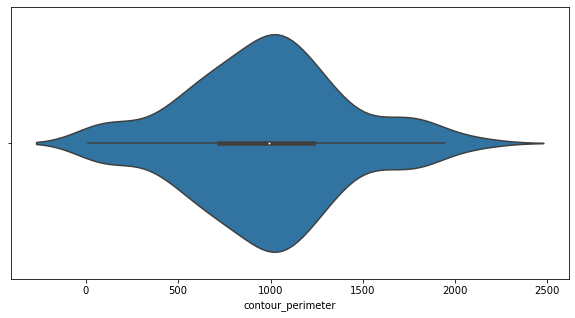

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


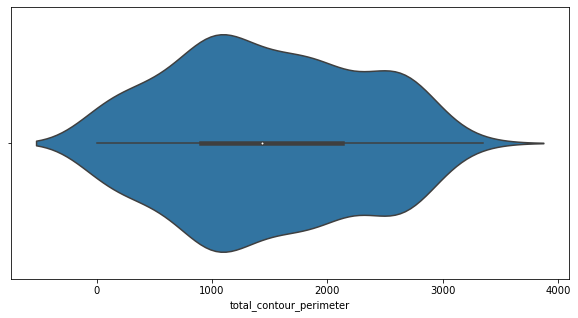

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


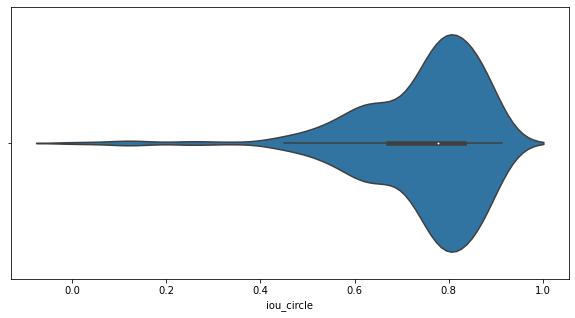

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


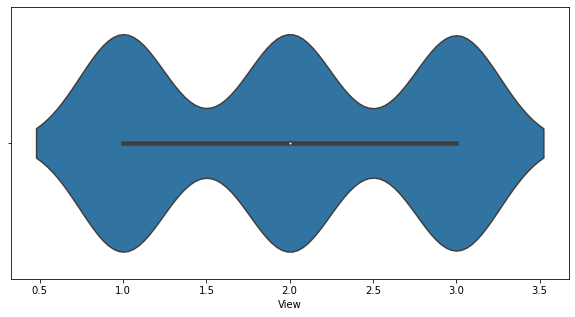

In [17]:
for i in df.columns:
    plt.figure(figsize = (10,5))
    ax= sns.violinplot(df[i])
    plt.show()

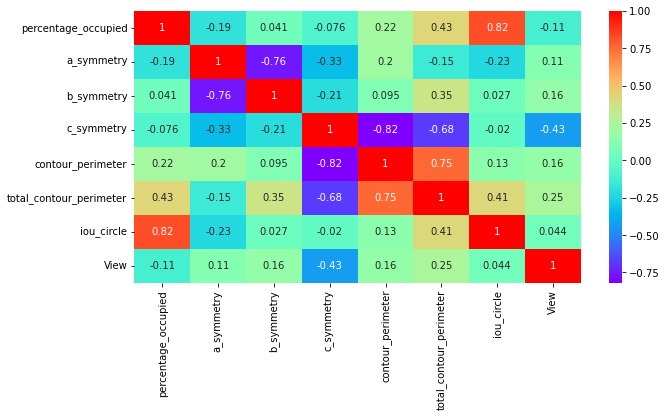

In [18]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contour_perimeter', ylabel='c_symmetry'>

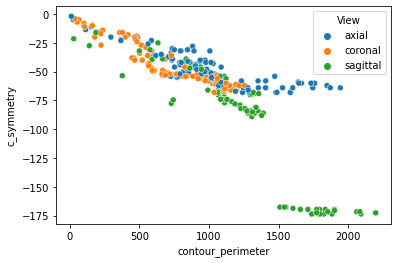

In [56]:
sns.scatterplot(df['contour_perimeter'],df['c_symmetry'], hue = df['View'])

In [111]:
#Sauvegarder les prédictions : 
df.to_csv('df_training.csv', index=True)

## 1.3- Data normalization

Nous normalisons nos données à l'aide de StandardScaler, et nous avons effectué un PCA pour déterminer le nombre optimale de features à prendre

In [19]:
X = df.drop(['View'],axis=1)
y = df.View

In [20]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

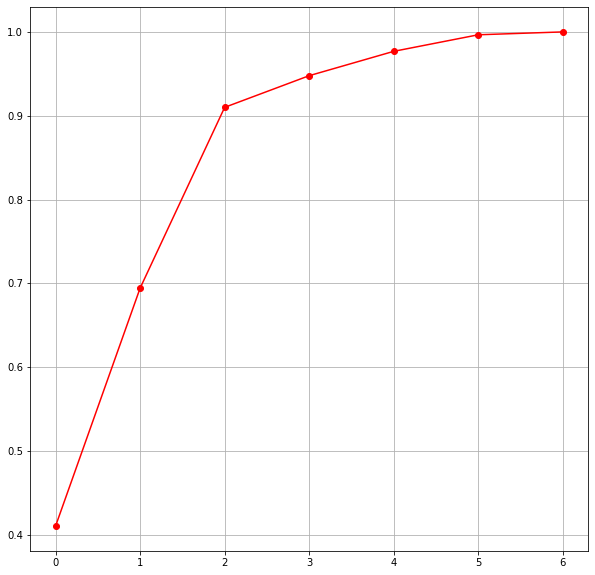

In [21]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

Grâce au précédent graphe, nous voyons que la variance est supérieure à 99%  avec n=5. Nous créons donc un nouveau X contenant les 5 composantes principales du PCA

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

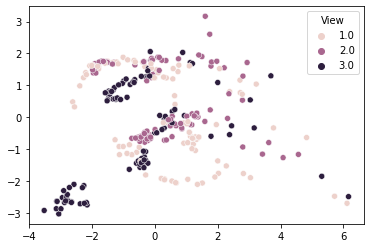

In [63]:
#AS per the graph, we can see that 2 principal components attribute for 90% of variation in the data. 
#we shall pick the first 2 components for our prediction.
pca_new = PCA(n_components=5)
X_new = pca_new.fit_transform(X)

sns.scatterplot(X_new[:,0],X_new[:,1],hue=y)

## 1.4- Model implementation

Nous avons entrainé notre jeu de données à l'aide de différents algorithmes : 
- Logistic Regression
- Naive Bayes
- KNN
- Decision Tree
- SVM


### 1.4.1- Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Size of Dataset {}".format(len(X)))
logreg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=0)
logreg.fit(X_train,y_train)
predict=logreg.predict(X_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 299
Accuracy score on training set is 0.7416267942583732
Accuracy score on test set is 0.6555555555555556


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[18, 12,  2],
       [ 2, 22,  2],
       [ 4,  3, 25]])

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))


              precision    recall  f1-score   support

         1.0       0.75      0.56      0.64        32
         2.0       0.59      0.85      0.70        26
         3.0       0.86      0.78      0.82        32

    accuracy                           0.72        90
   macro avg       0.74      0.73      0.72        90
weighted avg       0.74      0.72      0.72        90



### 1.4.2 - Naive Bayes

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

print("Size of Dataset {}".format(len(X)))
clf = GaussianNB()
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=0)
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
print("Accuracy score on training set is {}".format(accuracy_score(clf.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 299
Accuracy score on training set is 0.7033492822966507
Accuracy score on test set is 0.6222222222222222


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[ 9, 22,  1],
       [ 2, 24,  0],
       [ 5,  7, 20]])

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))


              precision    recall  f1-score   support

         1.0       0.74      0.72      0.73        32
         2.0       0.66      0.73      0.69        26
         3.0       0.80      0.75      0.77        32

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90



### 1.4.3 - K-Nearest Neighbors

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

print("Size of Dataset {}".format(len(X)))
neigh = KNeighborsClassifier(n_neighbors=2)
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=0)
neigh.fit(X_train,y_train)
predict=neigh.predict(X_test)
print("Accuracy score on training set is {}".format(accuracy_score(neigh.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 299
Accuracy score on training set is 0.9425837320574163
Accuracy score on test set is 0.8555555555555555


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[29,  1,  2],
       [ 3, 23,  0],
       [ 6,  1, 25]])

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))


              precision    recall  f1-score   support

         1.0       0.76      0.91      0.83        32
         2.0       0.92      0.88      0.90        26
         3.0       0.93      0.78      0.85        32

    accuracy                           0.86        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.86      0.86        90



### 1.4.4 - Decision Tree

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print("Size of Dataset {}".format(len(X)))
clf = DecisionTreeClassifier(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=0)
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
print("Accuracy score on training set is {}".format(accuracy_score(clf.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 299
Accuracy score on training set is 1.0
Accuracy score on test set is 0.7333333333333333


### 1.4.5 - SVM

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
print("Size of Dataset {}".format(len(X)))
clf = svm.SVC()
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=0)
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
print("Accuracy score on training set is {}".format(accuracy_score(clf.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 299
Accuracy score on training set is 0.8086124401913876
Accuracy score on test set is 0.6888888888888889


Suite à l'entrainement de ces modèles, nous pouvons choisir KNN comme modèle, avec un accuracy score de 0.94 sur le training set et de 0.86 sur le test set. Nous pouvons noté un léger overfitting, qui aurait pu être réglé avec plus de temps.

### 1.5 - GridSearchCV with KNN and hyperparameter tuning

Nous utilisons GridSearchCV avec notre modèle KNN pour trouver les valeurs optimales des hyperparamètres

In [50]:
from sklearn.model_selection import GridSearchCV

In [49]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [48]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.84444444, 0.85555556, 0.85555556, 0.8       , 0.76666667,
       0.71111111, 0.71111111, 0.66666667, 0.7       , 0.67777778,
       0.7       , 0.66666667, 0.67777778, 0.66666667, 0.67777778,
       0.66666667, 0.65555556, 0.64444444, 0.64444444, 0.63333333])

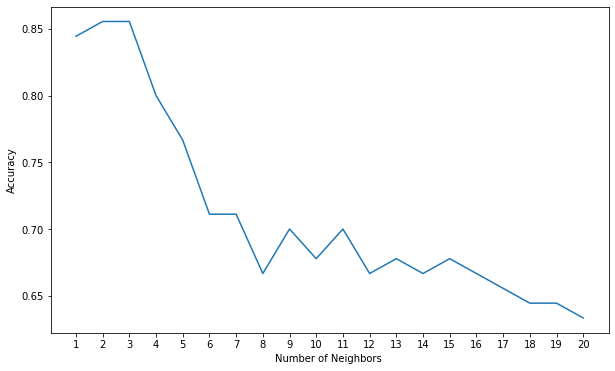

In [49]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [118]:
grid_params = { 'n_neighbors' : [1,2,3,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [119]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [120]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [121]:
# find the best score
g_res.best_score_

0.8372670807453416

In [122]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

On voit que les résultats obtenus ne changent pas tellement, et le résultat et légèrement en dessous de celui obtenu sans le GridSearchCV. Nous préférons garder nos précédents hyperparamètres : n_neighbors = 2

# 2- Test part

Suite à l'entrainement du modele, nous pouvons désormais prédire sur le nouveau jeu de données. 



impath Num: 0
The mask is composed of 1033 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 73.79%
Cropped image of dimension 35 x 40 pixels
The best initial loss is : 0.14230396902226525
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -20
The initial loss value is 11053.133912493211


impath Num: 1
The mask is composed of 1980 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 60.27%
Cropped image of dimension 73 x 45 pixels
The best initial loss is : 0.2
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -36


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


The initial loss value is 83358.85600762093


impath Num: 2
The mask is composed of 3086 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 66.80%
Cropped image of dimension 70 x 66 pixels
The best initial loss is : 0.13123784834737523
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -35
The initial loss value is 32165.70240492292


impath Num: 3
The mask is composed of 4671 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 76.05%
Cropped image of dimension 83 x 74 pixels
The best initial loss is : 0.05694712053093556
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -37
The initial loss value is 44228.579161960406


impath Num: 4
The mask is composed of 6296 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 68.

The best initial loss is : 0.1345333472063261
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -64
The initial loss value is 352288.946676332


impath Num: 25
The mask is composed of 1319 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 71.37%
Cropped image of dimension 44 x 42 pixels
The best initial loss is : 0.15011372251705837
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -22
The initial loss value is 16987.27030125944


impath Num: 26
The mask is composed of 10139 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 77.52%
Cropped image of dimension 109 x 120 pixels
The best initial loss is : 0.027517506657461287
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -54
The initial loss value is 128594.90010891434


impath Num: 27
The mask is composed of 14020 pixels
The percentage of pixe

The initial loss value is 1144524.298902545


impath Num: 46
The mask is composed of 4568 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 54.76%
Cropped image of dimension 97 x 86 pixels
The best initial loss is : 0.0796847635726795
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -48
The initial loss value is 195886.64524164223


impath Num: 47
The mask is composed of 14084 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 64.09%
Cropped image of dimension 164 x 134 pixels
The best initial loss is : 0.21009656347628514
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -67
The initial loss value is 2281953.3180483473


impath Num: 48
The mask is composed of 13047 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask

The initial loss value is 594762.1269216838


impath Num: 68
The mask is composed of 13858 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 62.44%
Cropped image of dimension 137 x 162 pixels
The best initial loss is : 0.22947034204069852
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -68
The initial loss value is 1876261.8283948558


impath Num: 69
The mask is composed of 16796 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 76.00%
Cropped image of dimension 130 x 170 pixels
The best initial loss is : 0.024172422005239343
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -65
The initial loss value is 2469766.3194091925


impath Num: 70
The mask is composed of 9572 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the 

The initial loss value is 516694.2108130615


impath Num: 90
The mask is composed of 5831 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 56.61%
Cropped image of dimension 100 x 103 pixels
The best initial loss is : 0.11078717201166181
The best associated parameters are : 
 a= 1 
 b= 0 
 c= -50
The initial loss value is 591770.5585060136


impath Num: 91
The mask is composed of 5175 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask is 76.26%
Cropped image of dimension 87 x 78 pixels
The best initial loss is : 0.06106280193236715
The best associated parameters are : 
 a= 0 
 b= 1 
 c= -39
The initial loss value is 45565.04709484865


impath Num: 92
The mask is composed of 12666 pixels
The percentage of pixels included in the bounding box is 100.00%
The percentage of the bounding box that is occupied by the mask i

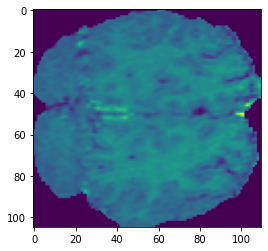

In [71]:
percentage_list_test = []
a_list_test = []
b_list_test = []
c_list_test = []
cp_list_test = []
tcp_list_test = []
iou_list_test = []

for i in range(100):
    
    if i <=9:
        ii = '00'
    elif i<=99:
        ii = '0'
    else:
        ii=''
        
    impath = '/Users/pierreloviton/PycharmProjects/data-science/ISEP/IA/Final Lab/test_data/im-'+ii+str(i)+'.tiff'
    print('\n\nimpath Num:',i)
    if os.path.isfile(impath)==False:
        percentage_list.append('Na')
        a_list_test.append('Na')
        b_list_test.append('Na')
        c_list_test.append('Na')
        cp_list_test.append('Na')
        tcp_list_test.append('Na')
        iou_list_test.append('Na')
    else:
        percentage, a, b, c = symmetry_analysis(impath)
        perimeter = contour_length_analysis(impath)
        total_contour_perimeter = all_contour_length_analysis(impath)
        iou = iou_circle_analysis(impath)
        
        percentage_list_test.append(percentage)
        a_list_test.append(a)
        b_list_test.append(b)
        c_list_test.append(c)
        cp_list_test.append(perimeter)
        tcp_list_test.append(total_contour_perimeter)
        iou_list_test.append(iou)

In [75]:
df_test = pd.DataFrame(columns=['percentage_occupied','a_symmetry','b_symmetry','c_symmetry','contour_perimeter','total_contour_perimeter','iou_circle'])

In [80]:
df_test['iou_circle']= iou_list_test
df_test['total_contour_perimeter']= tcp_list_test
df_test['contour_perimeter']= cp_list_test
df_test['c_symmetry']= c_list_test
df_test['b_symmetry']= b_list_test
df_test['a_symmetry']= a_list_test
df_test['percentage_occupied']= percentage_list_test

In [81]:
df_test.head()

,percentage_occupied,a_symmetry,b_symmetry,c_symmetry,contour_perimeter,total_contour_perimeter,iou_circle
0,73.785714,0.0,1,-20.0,454,303,0.531449
1,60.273973,1.0,0,-36.0,566,460,0.557194
2,66.796537,1.0,0,-35.0,747,816,0.789938
3,76.050147,0.0,1,-37.0,658,1226,0.852104
4,68.793706,1.0,0,-44.0,1100,1725,0.826107


In [82]:
df_test.shape

(100, 7)

In [83]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_test = sc.fit_transform(df_test)

In [84]:
#AS per the graph, we can see that 2 principal components attribute for 90% of variation in the data. 
#we shall pick the first 2 components for our prediction.
pca_new = PCA(n_components=5)
df_test = pca_new.fit_transform(df_test)

In [100]:
predict=neigh.predict(df_test)

In [101]:
test_labels = pd.DataFrame(columns=['View'])

In [102]:
test_labels['View'] = predict

In [103]:
test_labels.value_counts()

View
1.0     46
2.0     29
3.0     25
dtype: int64

In [104]:
test_labels.View.loc[test_labels.View == 1] = 'axial'
test_labels.View.loc[test_labels.View == 2] = 'coronal'
test_labels.View.loc[test_labels.View == 3] = 'sagittal'

In [106]:
test_labels.head()

,View
0,axial
1,axial
2,coronal
3,coronal
4,sagittal


In [108]:
test_labels.shape

(100, 1)

In [110]:
#Sauvegarder les prédictions : 
test_labels.to_csv('test_labels.csv', index=True)